In [1]:
import numpy as np
from numpy import random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

# Random number generation

In [2]:
#https://www.datacamp.com/community/tutorials/numpy-random
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

# simple random number generations
x = random.randint(100)
print(x, ' random.randint(100) ')

x = random.rand()
print(x, ' random.rand() ')

x=random.randint(10, size=(4))
print(x, ' x=random.randint(10, size=(4))')

x = random.randint(100, size=(3, 5))
print(x, ' random.randint(100, size=(3, 5))')

x = random.rand(5)
print(x, ' random.rand(5)')

x = random.rand(3, 4)
print(x, ' random.rand(3, 4)')


1  random.randint(100) 
0.7892307062748343  random.rand() 
[3 7 4 6]  x=random.randint(10, size=(4))
[[12 90 30 16 12]
 [80 76  2 51 53]
 [60 18 39 15 88]]  random.randint(100, size=(3, 5))
[0.69966592 0.72177977 0.26507937 0.68146072 0.36768198]  random.rand(5)
[[0.25899111 0.31913033 0.61093742 0.72054635]
 [0.3583948  0.79444369 0.9487248  0.19628643]
 [0.55396607 0.13178228 0.23089426 0.25716348]]  random.rand(3, 4)


In [3]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
# result of flipping a coin 10 times, tested 100 times.
n, p = 5, .5  # number of trials, probability of each trial
s = random.binomial(n, p, 10)
print(s, ' random.binomial(n, p, 10)')

[2 3 4 1 4 3 3 2 2 2]  random.binomial(n, p, 10)


In [4]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
# "A real world example. A company drills 9 wild-cat oil exploration wells,
# each with an estimated probability of success of 0.1. All nine wells fail.
# What is the probability of that happening?"
# Let’s do 200 trials of the model, and count the number that generate zero positive results.
trial = random.binomial(9, 0.1, 200)
trialsum = sum(trial == 0)/200

print(trial, ' trials')
print(trialsum, ' is trialsum') 

[1 1 1 0 1 1 2 0 2 1 0 0 0 1 0 0 2 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 2 0
 0 1 3 1 0 2 0 1 1 0 0 0 2 1 0 3 2 0 2 0 1 0 1 0 1 1 0 2 1 0 2 0 0 0 0 2 2
 0 1 0 1 0 2 1 2 0 0 1 2 0 0 1 1 1 0 2 1 1 1 1 1 1 0 2 2 1 3 4 1 1 0 0 1 2
 3 0 0 2 1 0 0 0 3 0 2 0 0 2 1 0 2 1 0 2 1 1 1 2 1 1 1 1 2 1 0 1 4 0 0 0 0
 1 2 0 0 3 0 0 0 1 2 1 0 0 1 2 1 1 0 1 0 2 1 1 1 2 0 2 2 0 1 0 0 2 3 0 1 0
 0 0 1 1 2 1 2 0 1 1 1 0 1 1 1]  trials
0.4  is trialsum


In [5]:
#Gamma distribution https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html
scale, size= 5, 50
gammagen= random.gamma(scale, size=size)
print(gammagen, ' gamma gen')

[6.33271272 6.08798463 4.83587415 2.33707858 4.68635402 9.3589995
 9.76767416 6.01717028 6.44762134 6.5301838  1.51429425 5.49604614
 2.78999585 8.65737028 6.41343368 7.58582327 3.66662972 9.40290649
 4.8214339  4.153838   9.05021361 5.61439394 4.33860245 1.95983812
 8.71381304 9.27944112 9.67183297 4.65053065 2.96191779 6.29569898
 6.32260069 5.25300676 3.55855452 6.58998851 2.90200903 5.81734968
 3.29593391 1.1512089  5.49698621 7.91323832 4.57744244 6.2374267
 6.370672   2.23099908 4.22989539 3.83077865 5.62405872 7.04951711
 6.04884512 7.46012692]  gamma gen


In [6]:
# using scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
#https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
data_normal = norm.rvs(size=5,loc=0,scale=1) 
print(data_normal, ' data normal')

[ 0.48085718  1.88092088  1.34503242 -1.39640509  0.12749924]  data normal


# Visualising the distributions

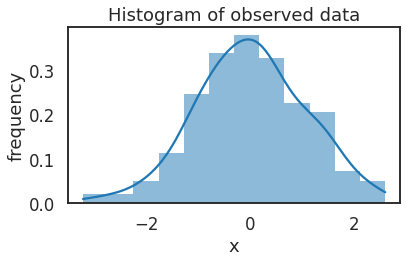

<Figure size 432x288 with 0 Axes>

In [7]:
sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

data = np.random.randn(200)

#histogram using seaborn (sns)
ax = plt.subplot()
sns.histplot(data, kde=True, ax=ax, stat="density", linewidth=0) # smooth using KDE: https://en.wikipedia.org/wiki/Kernel_density_estimation
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='frequency');
plt.tight_layout()
plt.show()
plt.savefig('histo_seaborn.png')
plt.clf()


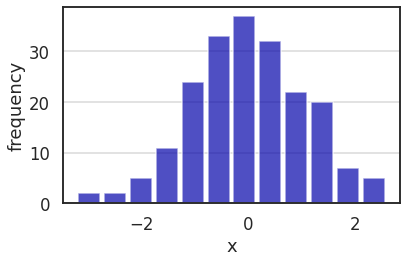

<Figure size 432x288 with 0 Axes>

In [8]:

#plot using matplotlib
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('x')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()
plt.savefig('histo_matplotlib.png')
plt.clf()
 


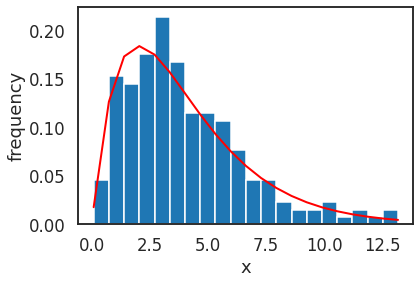

<Figure size 432x288 with 0 Axes>

In [9]:
 #Gamma distribution https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html
shape, scale = 2., 2.  # mean=2, std=2 
s_gamma = np.random.gamma(shape, scale, 200)
#print(s)

import scipy.special as sps  
count, bins, ignored = plt.hist(s_gamma, 20, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) / (sps.gamma(shape)*scale**shape))
plt.xlabel('x')
plt.ylabel('frequency')
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
plt.savefig('gamma_dist.png')
plt.clf()


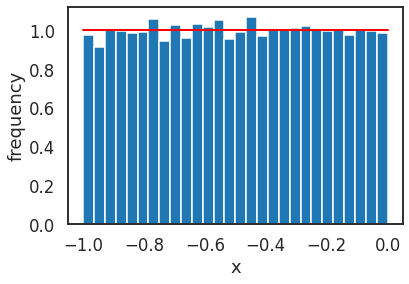

<Figure size 432x288 with 0 Axes>

In [11]:
#Uniform distribution https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
s_uniform = np.random.uniform(-1,0,20000) # -1 and 0 give limits

count, bins, ignored = plt.hist(s_uniform, bins='auto', density=True) 
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.xlabel('x')
plt.ylabel('frequency') 
plt.show()
plt.savefig('uniform_dist.png')
plt.clf()